In [7]:
import csv
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import pandas as pd
import json

Below takes a csv file with Date Time Lat Lon and Ele and attempts to create a gpx file with it

In [4]:
def write_gpx(data, vernum):
    gpx = gpxpy.gpx.GPX()
    for row in data:    
        gpx_track = gpxpy.gpx.GPXTrack()
        gpx_segment = gpxpy.gpx.GPXTrackSegment()
        gpx_track.segments.append(gpx_segment)
        #gpx_point = gpxpy.gpx.GPXTrackPoint(['Lat'], ['Lon'], elevation=['Ele'], time=f"{['Date']}T{['Time']}")
        gpx_point = gpxpy.gpx.GPXTrackPoint(['Lat'], ['Lon'], elevation=['Ele'])
        gpx_segment.points.append(gpx_point)
        gpx.tracks.append(gpx_track)

        with open('ver' + vernum + '.gpx', 'w') as gpx_file:
            gpx_file.write(gpx.to_xml())

#df = pd.read_csv('0314.csv')
#df['DateTime'] = df['Date'] + 'T' + df['Time'] + 'Z'
#write_gpx(df, '5')
#gpx = gpxpy.parse(gpx_file)

Just trying to uplaod a gpx file here.....

In [5]:
#fn = "0314.gpx"

#with open(fn) as f:
    #gf = gpxpy.parse(f)
    #gpxpy.parse(f).nsmap['gpxtpx'] = 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'
    #gf.nsmap['gpxx'] = 'http://www.garmin.com/xmlschemas/GpxExtensions/v3'
    #gpxpy.parse(f).nsmap['gpx_style'] = 'http://www.topografix.com/GPX/gpx_style/0/2'
    #gf.schema_locations = ['http://www.topografix.com/GPX/1/1','http://www.topografix.com/GPX/1/1/gpx.xsd','http://www.garmin.com/xmlschemas/GpxExtensions/v3','http://www.garmin.com/xmlschemas/GpxExtensionsv3.xsd','http://www.garmin.com/xmlschemas/TrackPointExtension/v1','http://www.garmin.com/xmlschemas/TrackPointExtensionv1.xsd','http://www.topografix.com/GPX/gpx_style/0/2','http://www.topografix.com/GPX/gpx_style/0/2/gpx_style.xsd']

    
#with open(fn+".new.gpx", 'w+') as f:
    #f.write(gf.to_xml('1.1'))

Lets Try this all again

In [36]:
#Grab CSV Data
df = pd.read_csv('0314.csv')
df['DateTime'] = df['Date'] + 'T' + df['Time']
df

,Date,Time,Lat,Lon,Ele,DateTime
0,2023-03-14,10:00:00,34.103722,118.272612,143.3,2023-03-14T10:00:00
1,2023-03-14,10:00:01,34.103718,118.272587,145.7,2023-03-14T10:00:01
2,2023-03-14,10:00:02,34.103713,118.272606,146.4,2023-03-14T10:00:02
3,2023-03-14,10:00:03,34.103729,118.272636,143.9,2023-03-14T10:00:03
4,2023-03-14,10:00:04,34.103721,118.272636,143.4,2023-03-14T10:00:04
...,...,...,...,...,...,...
2006,2023-03-14,10:33:26,34.050717,118.260299,150.5,2023-03-14T10:33:26
2007,2023-03-14,10:33:27,34.050719,118.260290,150.1,2023-03-14T10:33:27
2008,2023-03-14,10:33:28,34.050715,118.260285,150.8,2023-03-14T10:33:28
2009,2023-03-14,10:33:29,34.050722,118.260285,151.4,2023-03-14T10:33:29


In [44]:
# Extract GPS data from Pandas df
lats = df['Lat'].tolist()
lons = df['Lon'].tolist()
elevs = df['Ele'].tolist()
times = df['DateTime'].tolist()

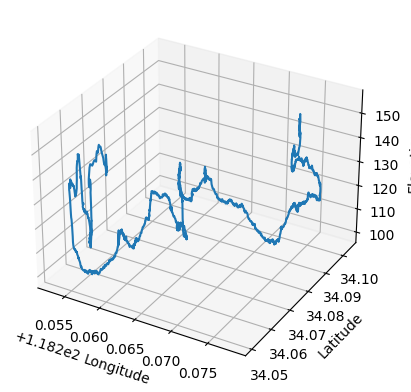

In [45]:
# Create 3D plot of GPS data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lons, lats, elevs)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
plt.show()

C:\Users\Joel\AppData\Local\Temp\ipykernel_20044\2902559248.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


KeyboardInterrupt: 

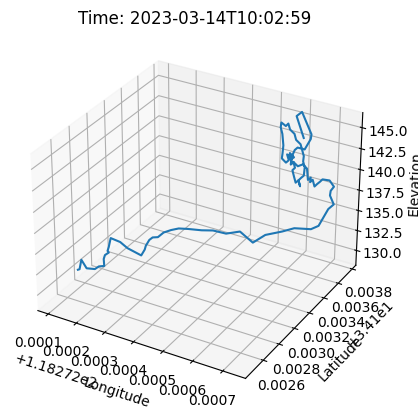

In [27]:
images = []
for i in range(len(lats)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(lons[:i], lats[:i], elevs[:i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Elevation')
    ax.set_title(f'Time: {times[i]}')
    filename = f'image_{i}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()